In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

github = 'https://raw.githubusercontent.com/ecostadelle/RandomForestTex/main/db/transforma.csv'

df = pd.read_csv(github, sep = ';',decimal=",")
X = df[['ira_nb1', 'ira_mr1', 'ira_nb3', 'rec_s1']]
y = y=df[['resultado_final']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

rfc = RandomForestClassifier(bootstrap=True,n_estimators=10, max_depth=None,
                             min_samples_split=2, random_state=0)
rfc.fit(X_train, y_train.values.ravel())

y_pred=rfc.predict(X_test)

print(recall_score(y_test.values.ravel(), y_pred, average=None))
print(accuracy_score(y_test.values.ravel(),y_pred))
print(confusion_matrix(y_test.values.ravel(),y_pred))

Tamanho de X_train:  (858, 4)
Tamanho de X_test:  (286, 4)
Tamanho de y_train:  (858, 1)
Tamanho de y_test:  (286, 1)
[0.96460177 0.51666667]
0.8706293706293706
[[218   8]
 [ 29  31]]


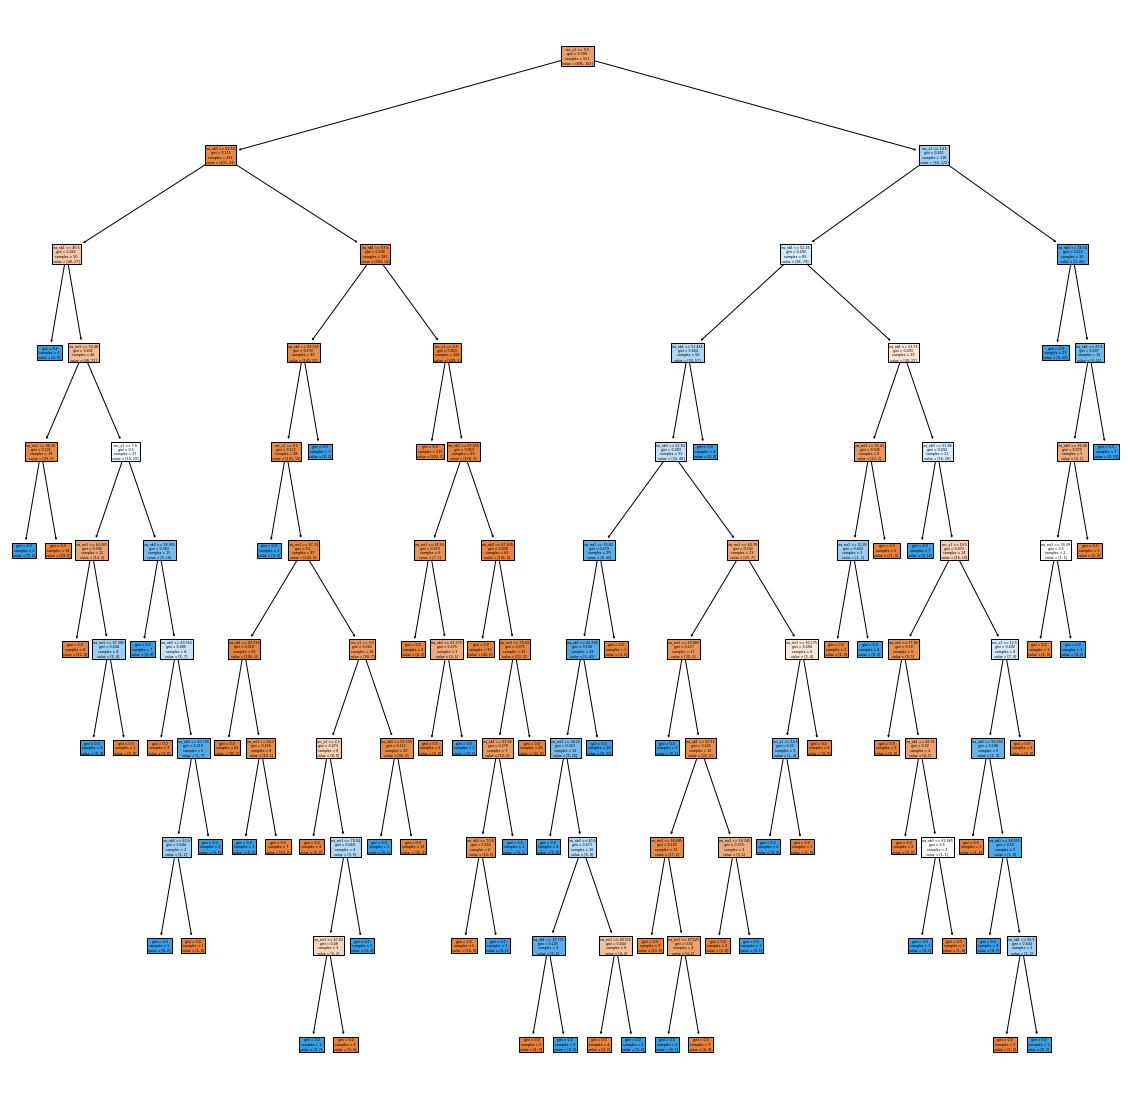

In [ ]:
#!pip install dtreeviz
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from sklearn import tree
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, filled=True)